Dogs vs. Cats

Dataset

In [50]:
import pathlib
import os
import shutil

In [51]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [52]:
print(base_dir / 'test')

dogs-vs-cats\test


In [53]:
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')

In [54]:
make_dataset_for_image_dataset_from_directory('train', 2400, 11999)

src:dogs-vs-cats-original\train\dog.2400.jpg => dst:dogs-vs-cats\train\dog\dog.2400.jpg
src:dogs-vs-cats-original\train\dog.2500.jpg => dst:dogs-vs-cats\train\dog\dog.2500.jpg
src:dogs-vs-cats-original\train\dog.2600.jpg => dst:dogs-vs-cats\train\dog\dog.2600.jpg
src:dogs-vs-cats-original\train\dog.2700.jpg => dst:dogs-vs-cats\train\dog\dog.2700.jpg
src:dogs-vs-cats-original\train\dog.2800.jpg => dst:dogs-vs-cats\train\dog\dog.2800.jpg
src:dogs-vs-cats-original\train\dog.2900.jpg => dst:dogs-vs-cats\train\dog\dog.2900.jpg
src:dogs-vs-cats-original\train\dog.3000.jpg => dst:dogs-vs-cats\train\dog\dog.3000.jpg
src:dogs-vs-cats-original\train\dog.3100.jpg => dst:dogs-vs-cats\train\dog\dog.3100.jpg
src:dogs-vs-cats-original\train\dog.3200.jpg => dst:dogs-vs-cats\train\dog\dog.3200.jpg
src:dogs-vs-cats-original\train\dog.3300.jpg => dst:dogs-vs-cats\train\dog\dog.3300.jpg
src:dogs-vs-cats-original\train\dog.3400.jpg => dst:dogs-vs-cats\train\dog\dog.3400.jpg
src:dogs-vs-cats-original\train\

In [55]:
make_dataset_for_image_dataset_from_directory('validation', 0, 2399)

src:dogs-vs-cats-original\train\dog.0.jpg => dst:dogs-vs-cats\validation\dog\dog.0.jpg
src:dogs-vs-cats-original\train\dog.100.jpg => dst:dogs-vs-cats\validation\dog\dog.100.jpg
src:dogs-vs-cats-original\train\dog.200.jpg => dst:dogs-vs-cats\validation\dog\dog.200.jpg
src:dogs-vs-cats-original\train\dog.300.jpg => dst:dogs-vs-cats\validation\dog\dog.300.jpg
src:dogs-vs-cats-original\train\dog.400.jpg => dst:dogs-vs-cats\validation\dog\dog.400.jpg
src:dogs-vs-cats-original\train\dog.500.jpg => dst:dogs-vs-cats\validation\dog\dog.500.jpg
src:dogs-vs-cats-original\train\dog.600.jpg => dst:dogs-vs-cats\validation\dog\dog.600.jpg
src:dogs-vs-cats-original\train\dog.700.jpg => dst:dogs-vs-cats\validation\dog\dog.700.jpg
src:dogs-vs-cats-original\train\dog.800.jpg => dst:dogs-vs-cats\validation\dog\dog.800.jpg
src:dogs-vs-cats-original\train\dog.900.jpg => dst:dogs-vs-cats\validation\dog\dog.900.jpg
src:dogs-vs-cats-original\train\dog.1000.jpg => dst:dogs-vs-cats\validation\dog\dog.1000.jpg
s

In [56]:
make_dataset_for_image_dataset_from_directory('test', 12000, 12499)

src:dogs-vs-cats-original\train\dog.12000.jpg => dst:dogs-vs-cats\test\dog\dog.12000.jpg
src:dogs-vs-cats-original\train\dog.12100.jpg => dst:dogs-vs-cats\test\dog\dog.12100.jpg
src:dogs-vs-cats-original\train\dog.12200.jpg => dst:dogs-vs-cats\test\dog\dog.12200.jpg
src:dogs-vs-cats-original\train\dog.12300.jpg => dst:dogs-vs-cats\test\dog\dog.12300.jpg
src:dogs-vs-cats-original\train\dog.12400.jpg => dst:dogs-vs-cats\test\dog\dog.12400.jpg
src:dogs-vs-cats-original\train\cat.12000.jpg => dst:dogs-vs-cats\test\cat\cat.12000.jpg
src:dogs-vs-cats-original\train\cat.12100.jpg => dst:dogs-vs-cats\test\cat\cat.12100.jpg
src:dogs-vs-cats-original\train\cat.12200.jpg => dst:dogs-vs-cats\test\cat\cat.12200.jpg
src:dogs-vs-cats-original\train\cat.12300.jpg => dst:dogs-vs-cats\test\cat\cat.12300.jpg
src:dogs-vs-cats-original\train\cat.12400.jpg => dst:dogs-vs-cats\test\cat\cat.12400.jpg


Let's make Dataset objects

We are ready for image_dataset_from_directory

In [57]:
import tensorflow as tf

In [58]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 19198 files belonging to 2 classes.


In [59]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1]


In [60]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

Found 4798 files belonging to 2 classes.


In [61]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 998 files belonging to 2 classes.


In [62]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [63]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [64]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [65]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 average_pooling2d_7 (Averag  (None, 89, 89, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 average_pooling2d_8 (Averag  (None, 43, 43, 32)       0         
 ePooling2D)                                               

In [67]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [68]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
600/600 [==============================] - 145s 239ms/step - loss: 0.6242 - accuracy: 0.6507 - val_loss: 0.5569 - val_accuracy: 0.7220
Epoch 2/20
600/600 [==============================] - 113s 188ms/step - loss: 0.5356 - accuracy: 0.7322 - val_loss: 0.5025 - val_accuracy: 0.7566
Epoch 3/20
600/600 [==============================] - 111s 184ms/step - loss: 0.4835 - accuracy: 0.7691 - val_loss: 0.4842 - val_accuracy: 0.7695
Epoch 4/20
600/600 [==============================] - 112s 186ms/step - loss: 0.4467 - accuracy: 0.7931 - val_loss: 0.4514 - val_accuracy: 0.7918
Epoch 5/20
600/600 [==============================] - 113s 188ms/step - loss: 0.4215 - accuracy: 0.8107 - val_loss: 0.4592 - val_accuracy: 0.7828
Epoch 6/20
600/600 [==============================] - 110s 183ms/step - loss: 0.3934 - accuracy: 0.8250 - val_loss: 0.4686 - val_accuracy: 0.7780


In [69]:
import matplotlib.pyplot as plt

In [70]:
acc = history.history['accuracy']
loss = history.history['loss']

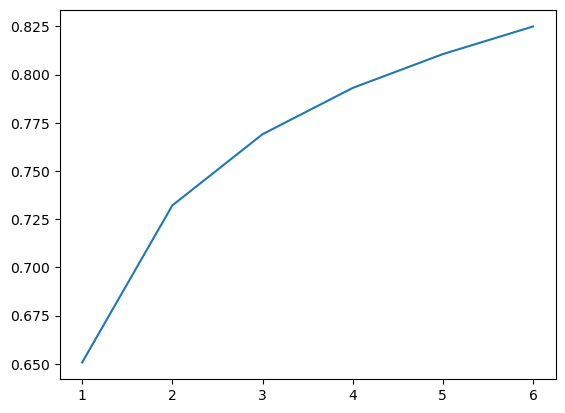

In [71]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [72]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 [==============================] - 0s 150ms/step


In [73]:
predictions

array([[0.01138461],
       [0.8740075 ],
       [0.11678939],
       [0.15712383],
       [0.00408531],
       [0.9910618 ],
       [0.6274728 ],
       [0.7291911 ],
       [0.6123839 ],
       [0.0504461 ],
       [0.49936026],
       [0.42933992],
       [0.5457321 ],
       [0.16325556],
       [0.6792277 ],
       [0.1944184 ],
       [0.52306324],
       [0.38410443],
       [0.1931249 ],
       [0.94327277],
       [0.99415416],
       [0.99379516],
       [0.6873026 ],
       [0.23273149],
       [0.14422193],
       [0.29141384],
       [0.01465573],
       [0.24543282],
       [0.09092996],
       [0.19684055],
       [0.02114712],
       [0.10366005]], dtype=float32)

Data Augmentation

In [74]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import datetime

In [75]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [76]:
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


In [77]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [78]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 average_pooling2d_10 (Avera  (None, 89, 89, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [79]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
shutil.rmtree('./logs')

In [81]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [82]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
]

In [83]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
600/600 [==============================] - 353s 579ms/step - loss: 0.6832 - accuracy: 0.5563 - val_loss: 0.6717 - val_accuracy: 0.5796
Epoch 2/20
600/600 [==============================] - 362s 603ms/step - loss: 0.6655 - accuracy: 0.5976 - val_loss: 0.6422 - val_accuracy: 0.6244
Epoch 3/20
600/600 [==============================] - 369s 615ms/step - loss: 0.6254 - accuracy: 0.6494 - val_loss: 0.5714 - val_accuracy: 0.7051
Epoch 4/20
600/600 [==============================] - 368s 614ms/step - loss: 0.5728 - accuracy: 0.6980 - val_loss: 0.5758 - val_accuracy: 0.6992
Epoch 5/20
600/600 [==============================] - 375s 624ms/step - loss: 0.5511 - accuracy: 0.7191 - val_loss: 0.5228 - val_accuracy: 0.7330
Epoch 6/20
600/600 [==============================] - 374s 623ms/step - loss: 0.5242 - accuracy: 0.7379 - val_loss: 0.5201 - val_accuracy: 0.7386
Epoch 7/20
600/600 [==============================] - 362s 604ms/step - loss: 0.5080 - accuracy: 0.7480 - val_loss: 0.5190 -

In [84]:
acc = history.history['accuracy']
loss = history.history['loss']

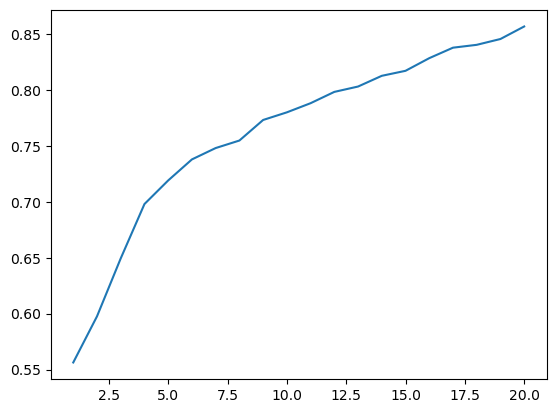

In [85]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [1]:
import ssl
print(ssl.OPENSSL_VERSION)

OpenSSL 1.1.1w  11 Sep 2023


In [41]:
from tensorflow.keras.preprocessing import image

In [47]:
from dog_cats import DogsCats

In [43]:
image_file = "dogs-vs-cats\test\dog\dog.12498.jpg"

In [44]:
model_path = "model.10-0.43.keras"

In [45]:
import tensorflow as tf

# Load the model from the specified path
model = tf.keras.models.load_model(model_path)


In [49]:

dogs_cats = DogsCats(model=model)

TypeError: DogsCats.__init__() got an unexpected keyword argument 'model'

In [14]:
dogs_cats.predict(image_file)


TypeError: DogsCats.predict() missing 1 required positional argument: 'images'